Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8762 - loss: 0.4149
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9671 - loss: 0.1080
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9774 - loss: 0.0736
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9838 - loss: 0.0515
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9874 - loss: 0.0398


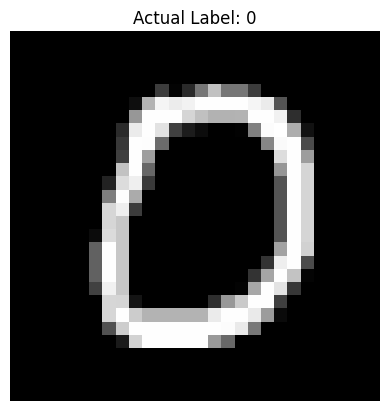

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
🔢 Predicted Label: 0


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train_flatten = x_train.reshape(-1, 28 * 28)
x_test_flatten = x_test.reshape(-1, 28 * 28)

# Build the model (re-run if needed)
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train_flatten, y_train, epochs=5)

# --- 🔍 Predict on one sample from the test set ---
index = 10  # You can change this to try different test samples

# Show the input image
plt.imshow(x_test[index], cmap='gray')
plt.title(f"Actual Label: {y_test[index]}")
plt.axis('off')
plt.show()

# Prepare the input for prediction
input_image = x_test[index].reshape(1, 28*28)  # Flatten and add batch dimension

# Predict the digit
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)

print(f"🔢 Predicted Label: {predicted_label}")
